In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wquantiles
from scipy import stats
from statsmodels import robust

# Estimates of Location

In [61]:
state = pd.read_csv('data/state.csv')
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [63]:
state['Population'].mean()

6162876.3

In [64]:
stats.trim_mean(state['Population'], 0.1)

4783697.125

In [65]:
state['Population'].median()

4436369.5

In [68]:
np.average(state['Murder.Rate'], weights=state['Population'])

4.445833981123393

In [70]:
wquantiles.median(state['Murder.Rate'], weights=state['Population'])

4.4

# Estimates of Variability

In [72]:
state.describe()

,Population,Murder.Rate
count,5.000000e+01,50.000000
mean,6.162876e+06,4.066000
std,6.848235e+06,1.915736
min,5.636260e+05,0.900000
25%,1.833004e+06,2.425000
50%,4.436370e+06,4.000000
75%,6.680312e+06,5.550000
max,3.725396e+07,10.300000


In [98]:
print(state['Population'].std())

6848235.347401142


In [99]:
print(state['Population'].quantile(0.75) - state['Population'].quantile(0.25))
print(np.quantile(state['Population'], 0.75) - np.quantile(state['Population'], 0.25))
print(stats.iqr(state['Population']))

4847308.0
4847308.0
4847308.0


In [101]:
print(stats.median_abs_deviation(state['Population'], scale='normal'))
print(robust.scale.mad(state['Population']))

3849876.1459979336
3849876.1459979336


# Exploring the Data Distribution

In [194]:
df = state[['Murder.Rate']].quantile([0.05, 0.25, 0.5, 0.75, 0.95])
df.index = [f'{p * 100}%' for p in df.index]
df.T

,5.0%,25.0%,50.0%,75.0%,95.0%
Murder.Rate,1.6,2.425,4.0,5.55,6.51


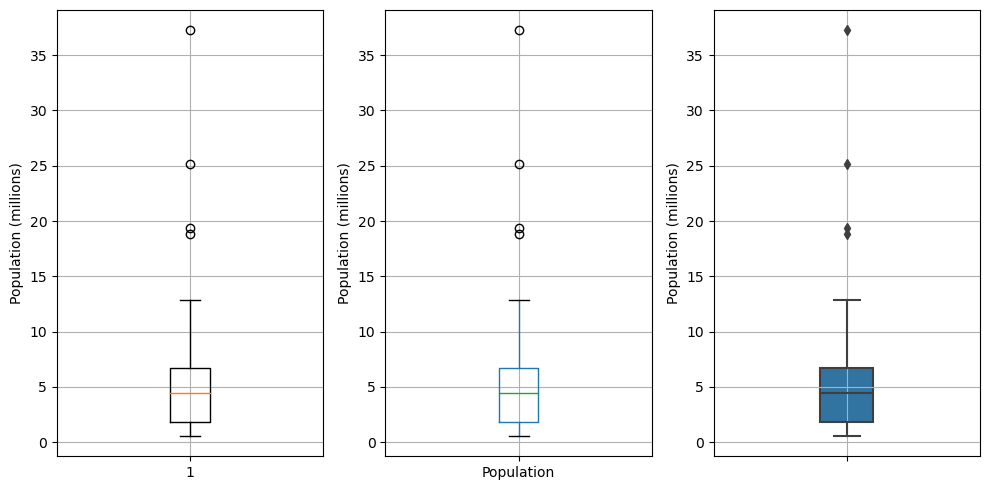

In [195]:
fig, ax = plt.subplots(1, 3, figsize=(10, 5))

ax[0].boxplot(x = state['Population'] / 1000000)
ax[0].set_ylabel('Population (millions)')
ax[0].grid(axis='both')

(state[['Population']] / 1000000).boxplot(ax=ax[1])
ax[1].set_ylabel('Population (millions)')

sns.boxplot(y = state['Population'] / 1000000, ax=ax[2], width=0.2)
ax[2].set_ylabel('Population (millions)')
ax[2].grid(axis='both')

plt.tight_layout()
plt.show()